In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----

**Carga del conjunto de datos**

In [2]:
df_store_sales = pd.read_csv('../data/processed/store_sales_limpio.csv')
df_store_sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Transformación de fechas y creación de df por año**

In [3]:
# Transformacioón de Order Date conjunto original
df_store_sales['Order Date'] = pd.to_datetime(df_store_sales['Order Date'], format='%d/%m/%Y')

# Tranformación de Ship Date conjunto original
df_store_sales['Ship Date'] = pd.to_datetime(df_store_sales['Ship Date'], format='%d/%m/%Y')

df_store_sales['Order Year'] = df_store_sales['Order Date'].dt.year
df_store_sales['Order Month'] = df_store_sales['Order Date'].dt.month

df_2015 = df_store_sales[df_store_sales['Order Year'] == 2015]
df_2016 = df_store_sales[df_store_sales['Order Year'] == 2016]
df_2017 = df_store_sales[df_store_sales['Order Year'] == 2017]
df_2018 = df_store_sales[df_store_sales['Order Year'] == 2018]

---

##### **Analizar el rendimiento de ventas**

**Ingreso por productos vendidos**

In [4]:
productos_vendidos = pd.pivot_table(
    data=df_store_sales,
    values='Sales',
    index='Product Name',
    aggfunc='sum'
)
productos_vendidos_desc = productos_vendidos.sort_values(by='Sales',ascending=False)
productos_vendidos_asc = productos_vendidos.sort_values(by='Sales', ascending=True)

productos_vendidos_top_mas = productos_vendidos_desc.head(10)
productos_vendidos_top_menos = productos_vendidos_asc.head(10)

In [5]:
print('Ingresos por Productos Más Vendidos (General Top 10)')
productos_vendidos_top_mas

Ingresos por Productos Más Vendidos (General Top 10)


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [6]:
print('Ingresos por Productos Menos Vendidos (General Top 10)')
productos_vendidos_top_menos

Ingresos por Productos Menos Vendidos (General Top 10)


,Sales
Product Name,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
Avery 5,5.760
Xerox 20,6.480
Grip Seal Envelopes,7.072
Acme Serrated Blade Letter Opener,7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",7.800
Xerox 1989,7.968
4009 Highlighters,8.040


In [7]:
def top_productos_mas_menos(df):
    td = pd.pivot_table(
        data=df,
        values='Sales',
        index=['Product Name'],
        aggfunc='sum'
    )

    td_desc = td.sort_values(by='Sales', ascending=False)
    td_asc = td.sort_values(by='Sales', ascending=True)
    
    td_top_mas = td_desc.head(10)
    td_top_menos = td_asc.head(10)

    return td_top_mas, td_top_menos

In [8]:
top_mas_2015,top_menos_2015 = top_productos_mas_menos(df_2015)
print('Ingresos por Productos Vendidos 2015')
top_mas_2015

Ingresos por Productos Vendidos 2015


,Sales
Product Name,
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
Lexmark MX611dhe Monochrome Laser Printer,11219.934
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",9624.945
Ibico EPK-21 Electric Binding System,9449.950
High Speed Automatic Electric Letter Opener,8187.650
GBC DocuBind TL300 Electric Binding System,5740.736
Global Deluxe High-Back Manager's Chair,5633.806
Tennsco 6- and 18-Compartment Lockers,5568.570
GBC DocuBind P400 Electric Binding System,5443.960


In [9]:
print('\nIngresos por Productos Vendidos 2015')
top_menos_2015


Ingresos por Productos Vendidos 2015


,Sales
Product Name,
Avery Round Ring Poly Binders,0.852
Acco Economy Flexible Poly Round Ring Binder,1.044
Avery Binder Labels,1.167
"Universal Recycled Hanging Pressboard Report Binders, Letter Size",1.234
Computer Printout Index Tabs,1.344
Presstex Flexible Ring Binders,1.365
Maxell 4.7GB DVD+R 5/Pack,1.980
"OIC Binder Clips, Mini, 1/4"" Capacity, Black",1.984
Acco Suede Grain Vinyl Round Ring Binder,2.502


In [10]:
top_mas_2016,top_menos_2016 = top_productos_mas_menos(df_2016)
print('Ingresos por Productos Vendidos 2016')
top_mas_2016

Ingresos por Productos Vendidos 2016


,Sales
Product Name,
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,15760.276
"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",11717.034
Zebra ZM400 Thermal Label Printer,6965.700
Canon PC1060 Personal Laser Copier,6019.914
Zebra GX420t Direct Thermal/Thermal Transfer Printer,5521.880
GBC Ibimaster 500 Manual ProClick Binding System,5402.958
HON 5400 Series Task Chairs for Big and Tall,5257.350
Canon PC940 Copier,4589.898
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,4297.644


In [11]:
print('\nIngresos por Productos Vendidos 2016')
top_menos_2016


Ingresos por Productos Vendidos 2016


,Sales
Product Name,
"Avery Triangle Shaped Sheet Lifters, Black, 2/Pack",0.984
Avery Printable Repositionable Plastic Tabs,1.720
Recycled Pressboard Report Cover with Reinforced Top Hinge,1.938
Wilson Jones DublLock D-Ring Binders,2.025
Round Ring Binders,2.080
"Sanford Uni-Blazer View Highlighters, Chisel Tip, Yellow",2.200
Newell 346,2.304
Maxell 4.7GB DVD+R 5/Pack,2.376
Avery 509,2.610


In [12]:
top_mas_2017,top_menos_2017 = top_productos_mas_menos(df_2017)
print('Ingresos por Productos Vendidos 2017')
top_mas_2017

Ingresos por Productos Vendidos 2017


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,25899.926
GBC Ibimaster 500 Manual ProClick Binding System,12860.562
"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
High Speed Automatic Electric Letter Opener,8842.662
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",8749.950
Okidata MB760 Printer,7834.400
Hewlett Packard LaserJet 3310 Copier,6839.886
"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",6367.878
Global Troy Executive Leather Low-Back Tilter,5510.780


In [13]:
print('\nIngresos por Productos Vendidos 2017')
top_menos_2017


Ingresos por Productos Vendidos 2017


,Sales
Product Name,
Newell 310,1.408
"OIC #2 Pencils, Medium Soft",1.504
Avery Durable Binders,1.728
Maxell 4.7GB DVD+R 5/Pack,1.980
"Acco Banker's Clasps, 5 3/4""-Long",2.304
Avery 479,2.610
Acco 3-Hole Punch,2.628
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",2.672
Newell 32,2.880


In [14]:
top_mas_2018,top_menos_2018 = top_productos_mas_menos(df_2018)
print('Ingresos por Productos Vendidos 2018')
top_mas_2018

Ingresos por Productos Vendidos 2018


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,35699.898
Martin Yale Chadless Opener Electric Letter Opener,11825.902
GBC DocuBind TL300 Electric Binding System,10943.278
Hewlett Packard LaserJet 3310 Copier,9239.846
Samsung Galaxy Mega 6.3,9239.780
Cubify CubeX 3D Printer Triple Head Print,7999.980
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7371.742
HON 5400 Series Task Chairs for Big and Tall,7220.094
GBC DocuBind P400 Electric Binding System,7077.148


In [15]:
print('\nIngresos por Productos Vendidos 2018')
top_menos_2018


Ingresos por Productos Vendidos 2018


,Sales
Product Name,
Hoover Commercial Lightweight Upright Vacuum,1.392
Self-Adhesive Ring Binder Labels,1.408
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
Computer Printout Index Tabs,1.680
Avery Hidden Tab Dividers for Binding Systems,1.788
Colored Push Pins,1.810
OIC Thumb-Tacks,1.824
"Holmes Visible Mist Ultrasonic Humidifier with 2.3-Gallon Output per Day, Replacement Filter",2.264
Avery 497,2.464


**Nota:**

Se logro obtener los ingresos obtenidos por productos (se muestra los 10 productos que más generaron) durante los 4 años.


**Ventas Totales y Promedio de Ventas por Año**

In [16]:
# Promedio de ventas por año

# General
ventas_generales_suma = np.sum(df_store_sales['Sales'])
ventas_generales_promedio = np.mean(df_store_sales['Sales'])

# 2015
ventas_totales_2015 = np.sum(df_2015['Sales'])
promedio_ventas_2015 = np.mean(df_2015['Sales'])

# 2016
ventas_totales_2016 = np.sum(df_2016['Sales'])
promedio_ventas_2016 = np.mean(df_2016['Sales'])

# 2017
ventas_totales_2017 = np.sum(df_2017['Sales'])
promedio_ventas_2017 = np.mean(df_2017['Sales'])

# 2018
ventas_totales_2018 = np.sum(df_2018['Sales'])
promedio_ventas_2018 = np.mean(df_2018['Sales'])

print(f'''
      Ventas Totales y Promedio de ventas por año

Ventas Total General: $ {ventas_generales_suma:,.2f}
Promedio Total General: {"$":>5} {promedio_ventas_2015:.2f}

Ventas Totales 2015: $ {ventas_totales_2015:,.2f}
Promedio 2015: {"$":>11} {promedio_ventas_2015:.2f}

Ventas Totales 2016: $ {ventas_totales_2016:,.2f}
Promedio 2016: {"$":>11} {promedio_ventas_2016:.2f}

Ventas Totales 2017: $ {ventas_totales_2017:,.2f}
Promedio 2017: {"$":>11} {promedio_ventas_2017:.2f}

Ventas Totales 2018: $ {ventas_totales_2018:,.2f}
Promedio 2018: {"$":>11} {promedio_ventas_2018:.2f}
''')


      Ventas Totales y Promedio de ventas por año

Ventas Total General: $ 2,261,536.78
Promedio Total General:     $ 245.70

Ventas Totales 2015: $ 479,856.21
Promedio 2015:           $ 245.70

Ventas Totales 2016: $ 459,436.01
Promedio 2016:           $ 223.57

Ventas Totales 2017: $ 600,192.55
Promedio 2017:           $ 236.86

Ventas Totales 2018: $ 722,052.02
Promedio 2018:           $ 221.62



**Nota:**

Se obtuvieron ventas totales y promedio de ventas por cada año.

**Analizar su comportamiento**

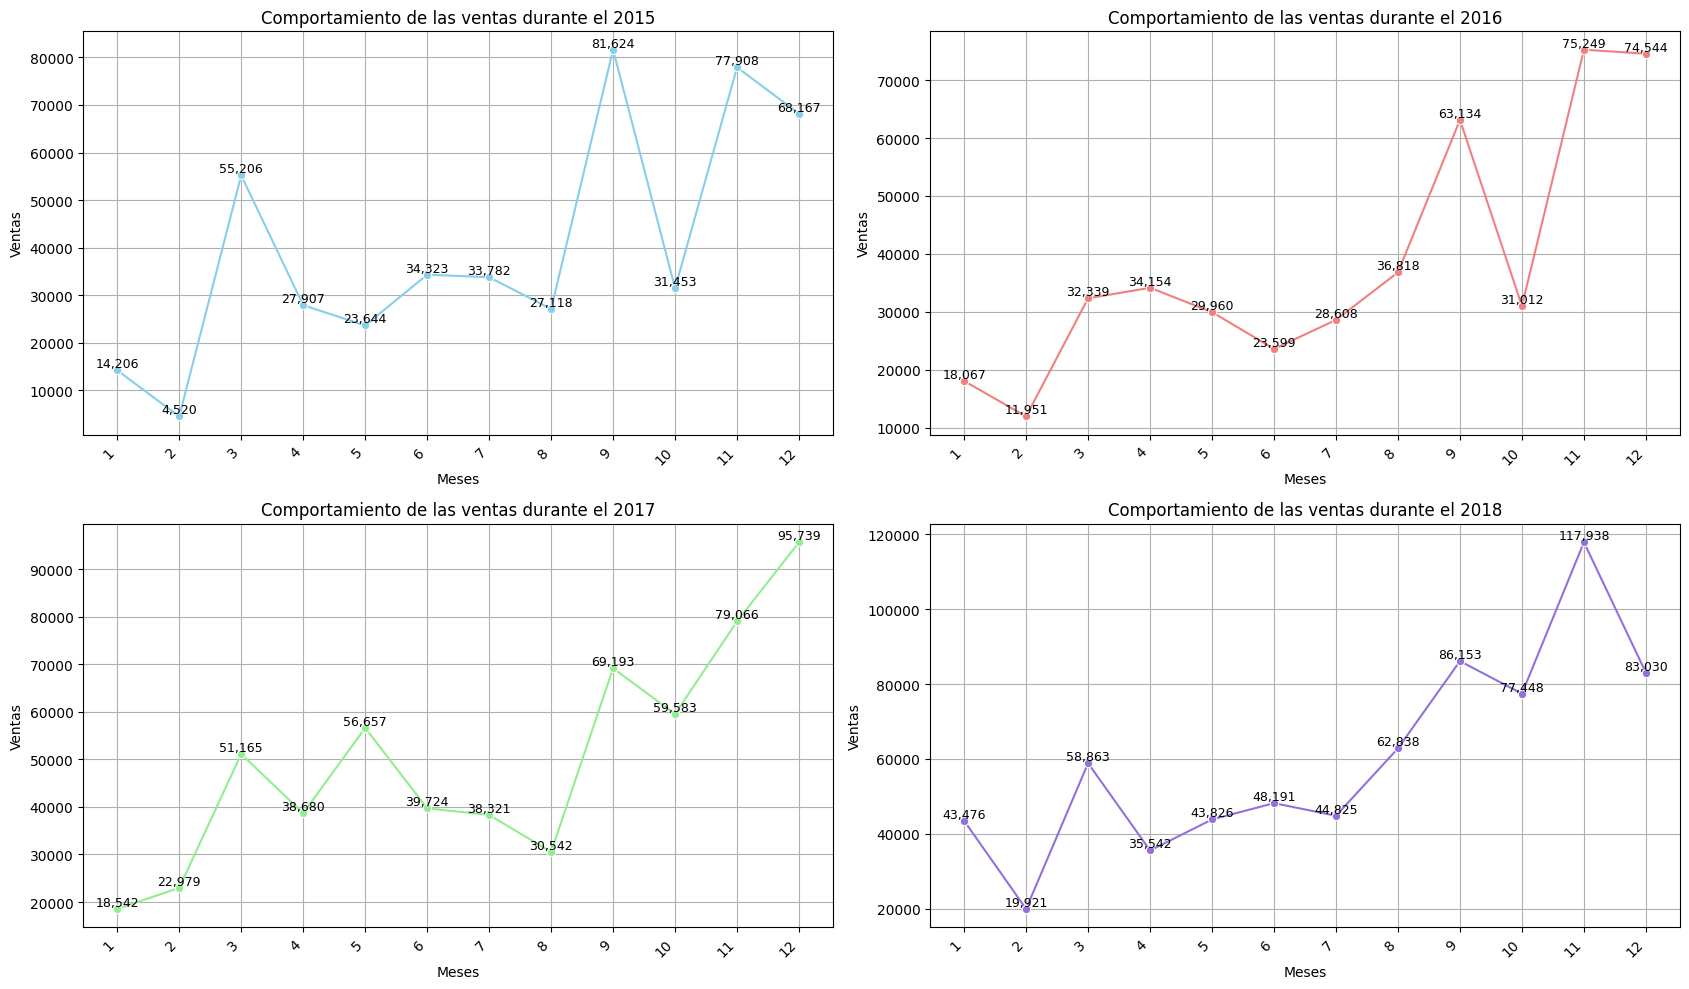

In [17]:
def grafico_lineas(lista_df, lista_colores, lista_annios):
    
    fig, axes = plt.subplots(2, 2, figsize=(17, 10))
    axes_flat = axes.flatten()

    for i,datas in enumerate(lista_df):
        td = pd.pivot_table(
        data=datas,
        values='Sales',
        index=['Order Month'],
        aggfunc='sum'
        )

        td = td.reset_index()
        
        ax = axes_flat[i] 

        sns.lineplot(data=td, x='Order Month', y='Sales', ax=ax, marker='o', color=lista_colores[i % len(lista_colores)])
        ax.set_title(f'Comportamiento de las ventas durante el {lista_annios[i % len(lista_annios)]}')
        ax.set_xlabel('Meses')
        ax.set_ylabel('Ventas')

        # Agrega los valores a los puntos
        for x, y in zip(td['Order Month'], td['Sales']):
            ax.text(x, y, f'{y:,.0f}', color='black', ha='center', va='bottom', fontsize=9)

        meses = datas['Order Month'].unique()
        ax.set_xticks(meses)
        ax.set_xticklabels(meses, rotation=45, ha='right')
        ax.grid(True)

    plt.tight_layout()
    plt.show()
df_lista = [df_2015, df_2016, df_2017, df_2018]
colores = ['skyblue', 'lightcoral', 'lightgreen', 'mediumpurple']
annios = ['2015', '2016', '2017', '2018']

grafico_lineas(
    lista_df=df_lista,
    lista_colores=colores,
    lista_annios=annios
)

**Nota:**

##### **1. Evolución de las ventas durante el 2015 (Original)**
Las ventas en 2015 muestran una gran fluctuación. Comenzaron bajas en enero, tuvieron un pico significativo en marzo, cayeron drásticamente en abril y mayo, se recuperaron ligeramente en junio, cayeron nuevamente en julio y agosto, y luego experimentaron un gran pico en septiembre. Finalmente, cayeron en octubre y noviembre, para luego subir en diciembre.
- Ventas más bajas: Febrero (4,520) y Agosto (27,118).
- Ventas más altas: Septiembre (81,624), Noviembre (77,908) y Diciembre (68,167).

##### **2. Evolución de las ventas durante el 2016 (Original)**
Las ventas en 2016 también muestran fluctuaciones, pero con un patrón diferente al de 2015. Comenzaron en un nivel moderado, tuvieron un valle en febrero, luego una recuperación y un crecimiento gradual hasta agosto, seguido de un pico en octubre y una caída en noviembre, para finalmente subir en diciembre.
- Ventas más bajas: Febrero (11,951).
- Ventas más altas: Septiembre (63,134) Noviembre (75,249) y Diciembre (74,544).

##### **3. Evolución de las ventas durante el 2017 (Original)**
Las ventas en 2017 muestran una tendencia más ascendente en la segunda mitad del año. Comenzaron bajas, subieron en marzo y abril, cayeron en junio, tuvieron un repunte en julio y agosto, y luego un crecimiento sostenido hasta un pico muy alto en diciembre.
- Ventas más bajas: Febrero (18,542).
- Ventas más altas: Septiembre (69,193), Noviembre (79,066) y Diciembre (95,739).

##### **4. Evolución de las ventas durante el 2018 (Original)**
Las ventas en 2018 presentan fluctuaciones con un pico muy pronunciado hacia el final del año. Comenzaron en un nivel moderado, tuvieron un valle en febrero, se recuperaron en marzo, luego una caída en abril y mayo, un repunte en junio, y un crecimiento muy fuerte en la segunda mitad del año, alcanzando un pico en noviembre y una ligera caída en diciembre.
- Ventas más bajas: Febrero (21,921).
- Ventas más altas: Septiembre (86,153), Noviembre (117,938) y Diciembre (83,030).

---

##### **Analisis de multiples dimensiones**

**Producto (``Product ID``, ``Product Name``, ``Sub-Category``)**

In [18]:
dimensiones_productos = pd.pivot_table(
    data=df_store_sales,
    values='Sales',
    index=['Product ID', 'Product Name', 'Category', 'Sub-Category'],
    aggfunc='sum'
)

# Order DF
dimensiones_productos_ordenado_desc = dimensiones_productos.sort_values(by='Sales', ascending=False)
dimensiones_productos_ordenado_asc = dimensiones_productos.sort_values(by='Sales',ascending=True)

dimensiones_productos_top_10_mas = dimensiones_productos_ordenado_desc.head(10)
dimensiones_productos_top_10_menos = dimensiones_productos_ordenado_asc.head(10)

In [19]:
print(f'Dimensión Productos con Más Ventas(Top 10)')
dimensiones_productos_top_10_mas

Dimensión Productos con Más Ventas(Top 10)


,,,,Sales
Product ID,Product Name,Category,Sub-Category,
TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,61599.824
OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,27453.384
TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferencing Unit,Technology,Machines,22638.480
FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,Furniture,Chairs,21870.576
OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,Office Supplies,Binders,19823.479
OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,19024.500
TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,Technology,Copiers,18839.686
TEC-MA-10001127,"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,Machines,18374.895
OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,17965.068


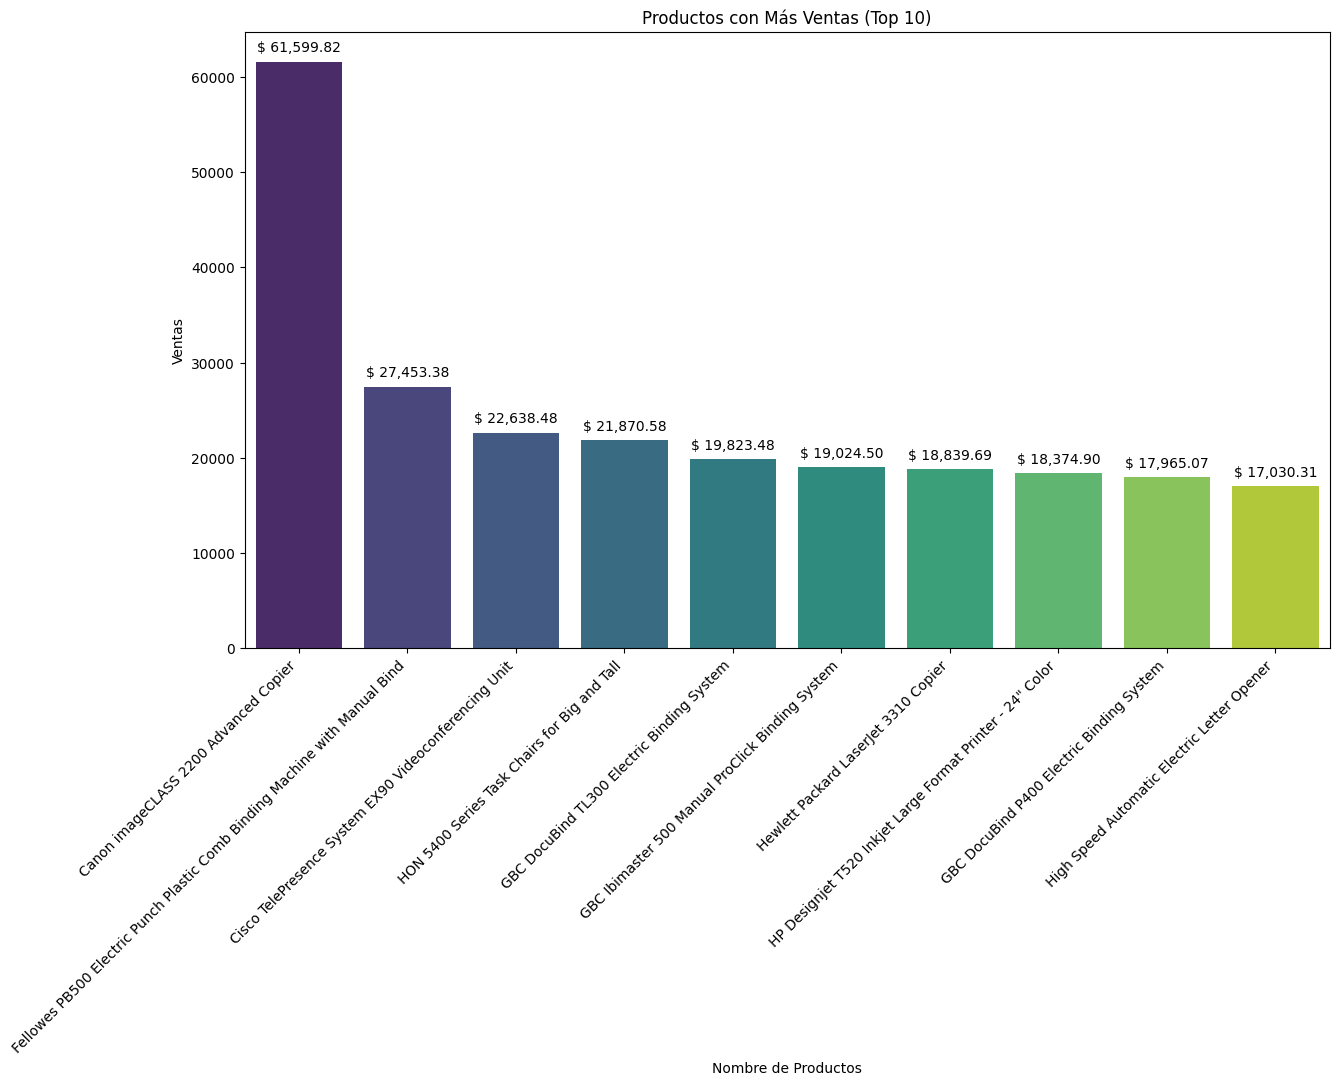

In [39]:
# Gráfica para Productos más vendidos
plt.figure(figsize=(14,8))
ax = sns.barplot(
    data=dimensiones_productos_top_10_mas,
    x='Product Name',
    y='Sales',
    hue='Product Name',
    palette='viridis'
)
plt.title('Productos con Más Ventas (Top 10)')
plt.xlabel('Nombre de Productos')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'$ {p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [20]:
print(f'Dimensión Productos con Menos Ventas(Top 10)')
dimensiones_productos_top_10_menos

Dimensión Productos con Menos Ventas(Top 10)


,,,,Sales
Product ID,Product Name,Category,Sub-Category,
OFF-AP-10002203,Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,Office Supplies,Appliances,1.624
OFF-LA-10003388,Avery 5,Office Supplies,Labels,5.760
OFF-PA-10000048,Xerox 20,Office Supplies,Paper,6.480
OFF-EN-10001535,Grip Seal Envelopes,Office Supplies,Envelopes,7.072
OFF-SU-10003936,Acme Serrated Blade Letter Opener,Office Supplies,Supplies,7.632
OFF-AR-10003986,Avery Hi-Liter Pen Style Six-Color Fluorescent Set,Office Supplies,Art,7.700
OFF-AR-10001149,"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",Office Supplies,Art,7.800
OFF-PA-10003919,Xerox 1989,Office Supplies,Paper,7.968
OFF-AR-10003477,4009 Highlighters,Office Supplies,Art,8.040


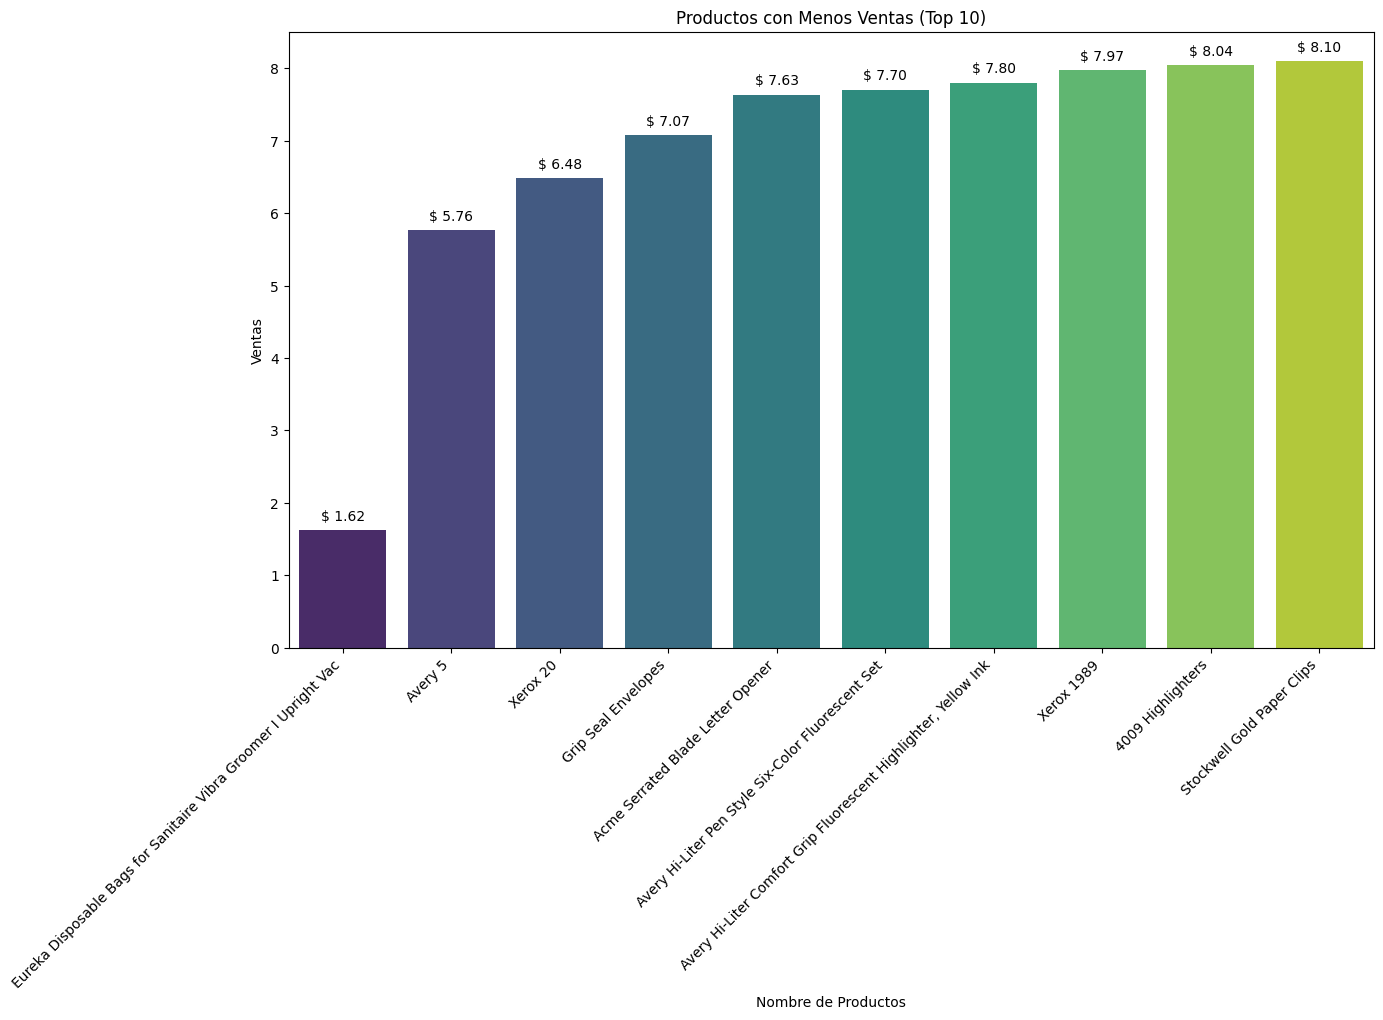

In [38]:
# Gráfica para Productos más vendidos
plt.figure(figsize=(14,8))
ax = sns.barplot(
    data=dimensiones_productos_top_10_menos,
    x='Product Name',
    y='Sales',
    hue='Product Name',
    palette='viridis'
)
plt.title('Productos con Menos Ventas (Top 10)')
plt.xlabel('Nombre de Productos')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'$ {p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

**Nota:**

Se logro identificar los 10 productos junto con las Sub-Categorias con mayor ingreso y los 10 con menos ingresos.

**Cliente (``Customer ID``, ``Customer Name``, `Segment`)**

In [21]:
dimensiones_clientes = pd.pivot_table(
    data=df_store_sales,
    values='Sales',
    index=['Customer ID', 'Customer Name', 'Segment'],
    aggfunc='sum'
)

# Order DF
dimensiones_clientes_desc = dimensiones_clientes.sort_values(by='Sales', ascending=False)
dimensiones_clientes_asc = dimensiones_clientes.sort_values(by='Sales', ascending=True)

dimensiones_clientes_top_mas = dimensiones_clientes_desc.head(10)
dimensiones_clientes_top_menos = dimensiones_clientes_asc.head(10)

In [22]:
print(f'Dimensión Clientes con Más Ventas(Top 10)')
dimensiones_clientes_top_mas

Dimensión Clientes con Más Ventas(Top 10)


,,,Sales
Customer ID,Customer Name,Segment,
SM-20320,Sean Miller,Home Office,25043.050
TC-20980,Tamara Chand,Corporate,19052.218
RB-19360,Raymond Buch,Consumer,15117.339
TA-21385,Tom Ashbrook,Home Office,14595.620
AB-10105,Adrian Barton,Consumer,14473.571
KL-16645,Ken Lonsdale,Consumer,14175.229
SC-20095,Sanjit Chand,Consumer,14142.334
HL-15040,Hunter Lopez,Consumer,12873.298
SE-20110,Sanjit Engle,Consumer,12209.438


In [23]:
print(f'Dimensión Clientes con Menos Ventas(Top 10)')
dimensiones_clientes_top_menos

Dimensión Clientes con Menos Ventas(Top 10)


,,,Sales
Customer ID,Customer Name,Segment,
TS-21085,Thais Sissman,Consumer,4.833
LD-16855,Lela Donovan,Corporate,5.304
SC-20845,Sung Chung,Consumer,14.112
CJ-11875,Carl Jackson,Corporate,16.520
MG-18205,Mitch Gastineau,Corporate,16.739
RS-19870,Roy Skaria,Home Office,22.328
SG-20890,Susan Gilcrest,Corporate,47.946
RE-19405,Ricardo Emerson,Consumer,48.360
IM-15055,Ionia McGrath,Consumer,48.400


**Nota:**

Se lograron identificar los clientes y el segmento al que pertencen, destacan los segmentos de *Consumer*, *Home Office* y 
*Corporate*.

**Categoría	(``Category``, ``Sub-Category``)**

In [24]:
dimensiones_categorias = pd.pivot_table(
    data=df_store_sales,
    values='Sales',
    index=['Category', 'Sub-Category'],
    aggfunc='sum'
)

# Ordenar DF
dimensiones_categorias_desc = dimensiones_categorias.sort_values(by='Sales', ascending=False)
dimensiones_categorias_asc = dimensiones_categorias.sort_values(by='Sales', ascending=True)

dimensiones_categorias_top_10_mas = dimensiones_categorias_desc.head(10)
dimensiones_categorias_top_10_menos = dimensiones_categorias_asc.head(10)

In [25]:
print(f'Dimensión Categorias con Más Ventas(Top 10)')
dimensiones_categorias_top_10_mas

Dimensión Categorias con Más Ventas(Top 10)


Sales
Category        Sub-Category             
Technology      Phones        327782.4480
Furniture       Chairs        322822.7310
Office Supplies Storage       219343.3920
Furniture       Tables        202810.6280
Office Supplies Binders       200028.7850
Technology      Machines      189238.6310
                Accessories   164186.7000
                Copiers       146248.0940
Furniture       Bookcases     113813.1987
Office Supplies Appliances    104618.4030

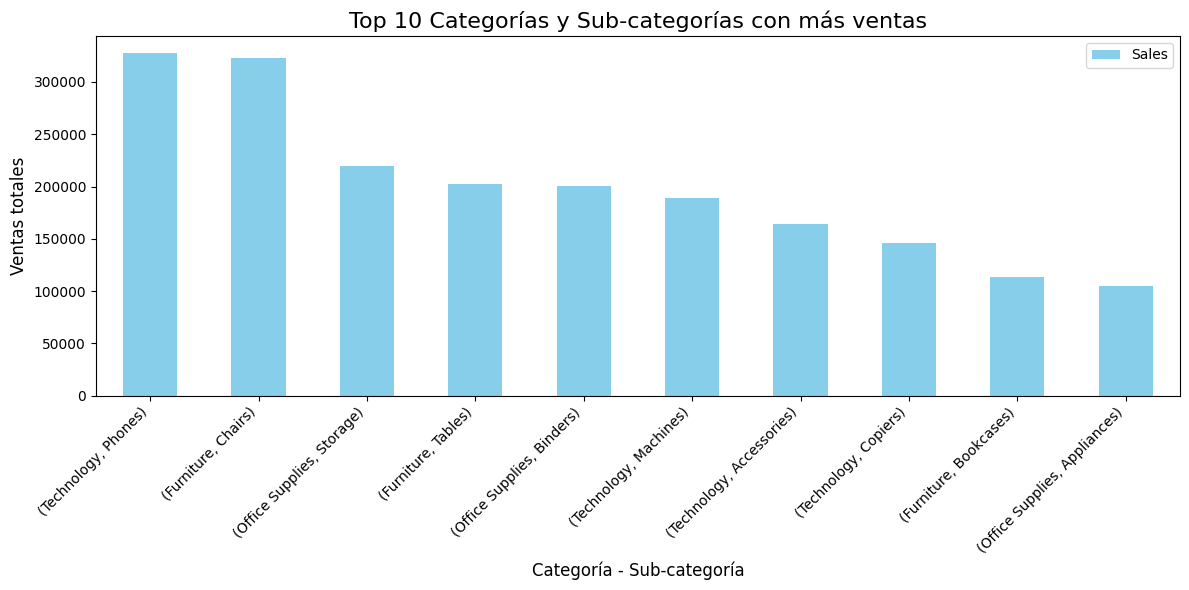

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar las barras
dimensiones_categorias_top_10_mas.plot(kind='bar', ax=ax, color='skyblue')

# Configurar el título y etiquetas
plt.title('Top 10 Categorías y Sub-categorías con más ventas', fontsize=16)
plt.xlabel('Categoría - Sub-categoría', fontsize=12)
plt.ylabel('Ventas totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta el diseño para que las etiquetas no se superpongan

# Mostrar el gráfico
plt.show()

In [26]:
print(f'Dimensión Categorias con Menos Ventas(Top 10)')
dimensiones_categorias_top_10_menos

Dimensión Categorias con Menos Ventas(Top 10)


Sales
Category        Sub-Category             
Office Supplies Fasteners       3001.9600
                Labels         12347.7260
                Envelopes      16128.0460
                Art            26705.4100
                Supplies       46420.3080
                Paper          76828.3040
Furniture       Furnishings    89212.0180
Office Supplies Appliances    104618.4030
Furniture       Bookcases     113813.1987
Technology      Copiers       146248.0940

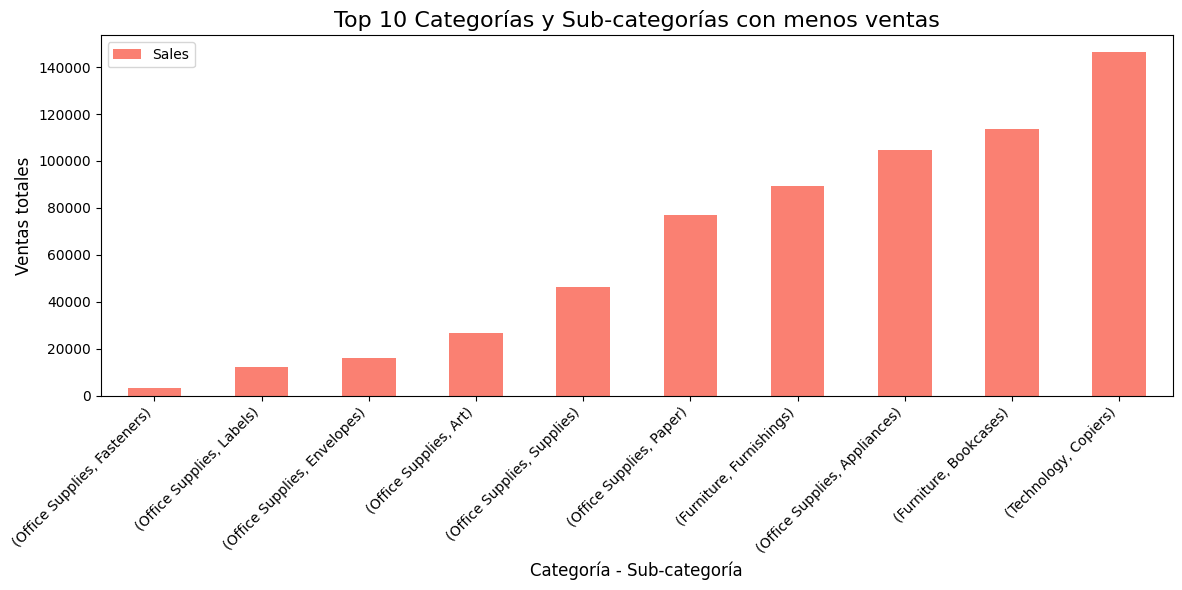

In [54]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar las barras
dimensiones_categorias_top_10_menos.plot(kind='bar', ax=ax, color='salmon')

# Configurar el título y etiquetas
plt.title('Top 10 Categorías y Sub-categorías con menos ventas', fontsize=16)
plt.xlabel('Categoría - Sub-categoría', fontsize=12)
plt.ylabel('Ventas totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Nota:**

Se logro identificar la categorias con más y menos ventas, destacando las categorias `Technology`, `Office Supplies` y `Furniture`.

**Región (``Country``, ``Region``, ``State``, ``City``, ``Postal Code``)**

In [27]:
dimensiones_region = pd.pivot_table(
    data=df_store_sales,
    values='Sales',
    index=['Country', 'Region', 'State', 'City', 'Postal Code']
)

# Ordenar DF
dimensiones_region_desc = dimensiones_region.sort_values(by='Sales', ascending=False)
dimensiones_region_asc = dimensiones_region.sort_values(by='Sales', ascending=True)

# Top
dimensiones_region_top_10_mas = dimensiones_region_desc.head(10)
dimensiones_region_top_10_menos = dimensiones_region_asc.head(10)

In [28]:
print(f'Dimensión Región con Más Ventas(Top 10)')
dimensiones_region_top_10_mas

Dimensión Región con Más Ventas(Top 10)


Sales
Country       Region  State          City         Postal Code             
United States East    New York       Jamestown    14701        2354.395000
              Central Indiana        Lafayette    47905        1784.046364
              West    Wyoming        Cheyenne     82001        1603.136000
                      Washington     Bellingham   98226        1263.413333
              Central Missouri       Independence 64055        1208.685000
              South   North Carolina Burlington   27217        1152.843818
              West    California     Burbank      91505        1082.386000
              East    New York       Buffalo      14215         906.349600
                      Massachusetts  Beverly      1915          861.063333
              West    Nevada         Sparks       89431         853.986667

In [29]:
print(f'Dimensión Región con Menos Ventas(Top 10)')
dimensiones_region_top_10_menos

Dimensión Región con Menos Ventas(Top 10)


Sales
Country       Region  State      City            Postal Code       
United States Central Texas      Abilene         79605        1.392
              East    Ohio       Elyria          44035        1.824
              South   Florida    Jupiter         33458        2.064
                                 Pensacola       32503        2.214
                                 Ormond Beach    32174        2.808
              West    California San Luis Obispo 93405        3.620
                      Washington Everett         98208        3.856
                                 Auburn          98002        4.180
              South   Arkansas   Springdale      72762        4.300
              West    Utah       Layton          84041        4.960

**Nota:**

Se logro identificar las regiones con mayor y menor ventas.

---

### **Conclusión**

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th>Sales</th>
    </tr>
    <tr>
      <th>Country</th>
      <th>Region</th>
      <th>State</th>
      <th>City</th>
      <th>Postal Code</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="10" valign="top">United States</th>
      <th>Central</th>
      <th>Texas</th>
      <th>Abilene</th>
      <th>79605</th>
      <td>1.392</td>
    </tr>
    <tr>
      <th>East</th>
      <th>Ohio</th>
      <th>Elyria</th>
      <th>44035</th>
      <td>1.824</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">South</th>
      <th rowspan="3" valign="top">Florida</th>
      <th>Jupiter</th>
      <th>33458</th>
      <td>2.064</td>
    </tr>
    <tr>
      <th>Pensacola</th>
      <th>32503</th>
      <td>2.214</td>
    </tr>
    <tr>
      <th>Ormond Beach</th>
      <th>32174</th>
      <td>2.808</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">West</th>
      <th>California</th>
      <th>San Luis Obispo</th>
      <th>93405</th>
      <td>3.620</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">Washington</th>
      <th>Everett</th>
      <th>98208</th>
      <td>3.856</td>
    </tr>
    <tr>
      <th>Auburn</th>
      <th>98002</th>
      <td>4.180</td>
    </tr>
    <tr>
      <th>South</th>
      <th>Arkansas</th>
      <th>Springdale</th>
      <th>72762</th>
      <td>4.300</td>
    </tr>
    <tr>
      <th>West</th>
      <th>Utah</th>
      <th>Layton</th>
      <th>84041</th>
      <td>4.960</td>
    </tr>
  </tbody>
</table>
</div>

Se debe enfocar en estos lugares ya que tienes las ventas más bajas durante los 4 años y por lo que representan un riesgo. 

Al igual se debe enfocar en la categoria de ``Office Supplies``, aunque esta categoria haya generado  `` $ 705422.3340`` dolares durante los ``4`` años existen sub-categorias que representan un riesgo como ``Appliances``, ``Labels``, ``Paper``, ``Envelopes``, ``Supplie``, ``Art``, ``Paper`` y	``Fasteners`` debido a que sus ingresos estan por debajo de los ``$ 10.00`` dolares.

Se identifico los siguientes clientes:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th></th>
      <th>Sales</th>
    </tr>
    <tr>
      <th>Customer ID</th>
      <th>Customer Name</th>
      <th>Segment</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>TS-21085</th>
      <th>Thais Sissman</th>
      <th>Consumer</th>
      <td>4.833</td>
    </tr>
    <tr>
      <th>LD-16855</th>
      <th>Lela Donovan</th>
      <th>Corporate</th>
      <td>5.304</td>
    </tr>
    <tr>
      <th>SC-20845</th>
      <th>Sung Chung</th>
      <th>Consumer</th>
      <td>14.112</td>
    </tr>
    <tr>
      <th>CJ-11875</th>
      <th>Carl Jackson</th>
      <th>Corporate</th>
      <td>16.520</td>
    </tr>
    <tr>
      <th>MG-18205</th>
      <th>Mitch Gastineau</th>
      <th>Corporate</th>
      <td>16.739</td>
    </tr>
    <tr>
      <th>RS-19870</th>
      <th>Roy Skaria</th>
      <th>Home Office</th>
      <td>22.328</td>
    </tr>
    <tr>
      <th>SG-20890</th>
      <th>Susan Gilcrest</th>
      <th>Corporate</th>
      <td>47.946</td>
    </tr>
    <tr>
      <th>RE-19405</th>
      <th>Ricardo Emerson</th>
      <th>Consumer</th>
      <td>48.360</td>
    </tr>
    <tr>
      <th>IM-15055</th>
      <th>Ionia McGrath</th>
      <th>Consumer</th>
      <td>48.400</td>
    </tr>
    <tr>
      <th>LB-16735</th>
      <th>Larry Blacks</th>
      <th>Consumer</th>
      <td>50.188</td>
    </tr>
  </tbody>
</table>
</div>

Estos clientes tiene las compras más bajas durantes los 4 años por lo que deben de ser compradores ocasionales, para este tipo de compradores se recomienda crear estrategias para que sigan comprando, como promociones, descuentos, ofertas o ofrecer algun beneficio para que sigan comprando.

La categoria de `Technology` es la que más ingresos genera por lo que se deberia de aumentar los productos en dicha categoria junto con estrategias de ventas y marketing seria posibles duplicar las ventas, y más ahora que es una epoca donde la tecnologia es fundamental y de lo más común.

Las regiones de `West` y `East` poseen las ventas más altas por lo que seria posible replicar las estrategias usada en otras regiones.

---

### ***Proximos Pasos***

Con la información obtenida de los objetivos se puede implementar algortmos para complementar la información recabada hasta el momento y poder enriquezer y diseñar estrategias.

**Implementación de algortmos:**
1. Análisis RFM(Recency, Frequency, Monetary).
2. Market Basket Analysis.
3. Preducción de demanda (ARIMA / Prophet).
4. Análisis ABC + XYZ.
5. Segementación por comportamiento.
6. Churn Prediction.